<a href="https://colab.research.google.com/github/JaoSchmidt/WaterCyberSecurity/blob/master/Water_CyberSec_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Datasets from SWaT

[source](https://itrust.sutd.edu.sg/itrust-labs_datasets/)

Secure Water Treatment is a Testbed build by iTrust, described here:

[A Dataset to Support Research in the Design of Secure Water Treatment Systems](https://www.researchgate.net/publication/305809559_A_Dataset_to_Support_Research_in_the_Design_of_Secure_Water_Treatment_Systems)

Overall process is divided into 6 subprocesses: p1,p2,p3,p4,p5,p6.
They are mentioned on section 2.1 of the article.

SWaT consists of a layered communication network, PCL, HMIs, SCADA and a historian(?). Data from the sensors is available to the SCADA system and recorded by the Historian for subsequent analysis. Diagram on the article

(All data is collect through wired network)

The attack model [1] for CPS is abstracted as a sextuple $(M; G; D; P; S_0 ;
S_e)$

Attacks are divided into four types: Single Stage Sigle Point $(SSSP)$,
Single Stage Multi Points $(SSMP)$, Multi Stage Single Point $(MSSP)$, Multi Stage Multi Points $(MSMP)$

Multi Stage is better represented by reading about [cyber kill chain](https://www.lockheedmartin.com/en-us/capabilities/cyber/cyber-kill-chain.html)

Multi Points means an attack on multiple "Actuators", i.e. devices that
convert a signal into a physical output, i.e. turning the pump off or on.

### Sensor and Actuators for each process

- p1: FIT101 LIT101  MV101 P101 P102
- p2: AIT201 AIT202 AIT203 FIT201  MV201  P201  P202 P203  P204 P205 P206
- p3: DPIT301 FIT301 LIT301 MV301 MV302  MV303 MV304 P301 P302
- p4: AIT401 AIT402 FIT401 LIT401 P401 P402 P403 P404 UV401
- p5: AIT501 AIT502 AIT503 AIT504 FIT501 FIT502 FIT503 FIT504 P501 P502 PIT501 PIT502 PIT503
- p6: FIT601 P601 P602 P603

## A1 & A2 (2015)


#### Network

In [ ]:
def group_n_print(df, column_name):
  grouped_df = df.groupby(column_name).size()
  print(grouped_df)

In [ ]:
import pandas as pd
import os

#from google.colab import drive
#drive.mount('/content/drive')

driver_absolute='drive/MyDrive/siemens'
driver_folder='itrust'
dataset_folder='SWaT.A1 & A2_Dec 2015/Network'
directory_files = os.listdir('/'.join([driver_absolute,driver_folder,dataset_folder]))

for file in directory_files:
  if file.endswith('.csv'):
    file_path = os.path.join(driver_absolute, driver_folder, dataset_folder, file)
    print(file_path)

drive/MyDrive/siemens/itrust/SWaT.A1 & A2_Dec 2015/Network/2015-12-22_034215_69.log.part01_sorted.csv
drive/MyDrive/siemens/itrust/SWaT.A1 & A2_Dec 2015/Network/2015-12-22_034215_69.log.part02_sorted.csv
drive/MyDrive/siemens/itrust/SWaT.A1 & A2_Dec 2015/Network/2015-12-22_034215_69.log.part03_sorted.csv
drive/MyDrive/siemens/itrust/SWaT.A1 & A2_Dec 2015/Network/2015-12-22_034215_69.log.part04_sorted.csv
drive/MyDrive/siemens/itrust/SWaT.A1 & A2_Dec 2015/Network/2015-12-22_034215_69.log.part05_sorted.csv
drive/MyDrive/siemens/itrust/SWaT.A1 & A2_Dec 2015/Network/2015-12-22_034215_69.log.part06_sorted.csv
drive/MyDrive/siemens/itrust/SWaT.A1 & A2_Dec 2015/Network/2015-12-22_034215_69.log.part07_sorted.csv
drive/MyDrive/siemens/itrust/SWaT.A1 & A2_Dec 2015/Network/2015-12-22_034215_69.log.part08_sorted.csv
drive/MyDrive/siemens/itrust/SWaT.A1 & A2_Dec 2015/Network/2015-12-22_034215_69.log.part09_sorted.csv
drive/MyDrive/siemens/itrust/SWaT.A1 & A2_Dec 2015/Network/2015-12-22_034215_69.lo

In [ ]:
import pandas as pd

file = 'drive/MyDrive/siemens/test.csv'
df = pd.read_csv(file,chunksize=2,delimiter=',');
result_df = pd.DataFrame()
for chunk in df:
  #clean = chunk['date'].map(lambda x: x.rstrip('#').rstrip(' '))
  clean = chunk['date']
  chunk['timestamp'] = pd.to_datetime(clean + ' ' + chunk['time'], format='%d%b%Y %H:%M:%S')
  print(chunk)

   num       date      time          orig type i/f_name   i/f_dir  \
0    1  23Dec2015  21:14:44  192.168.1.48  log     eth1  outbound   
1    2  23Dec2015  21:14:44  192.168.1.48  log     eth1  outbound   

            src           dst proto  ...  proxy_src_ip Modbus_Function_Code  \
0  192.168.1.60  192.168.1.20   tcp  ...  192.168.1.60                   76   
1  192.168.1.10  192.168.1.20   tcp  ...  192.168.1.10                   76   

   Modbus_Function_Description Modbus_Transaction_ID   SCADA_Tag  \
0  Read Tag Service - Response                 40563  HMI_AIT202   
1             Read Tag Service                  1061  HMI_FIT201   

                                        Modbus_Value service  s_port  Tag  \
0  0xaf 0x78 0x05 0x41; 0x00 0x00 0x00 0x00; 0x00...   44818   53250    0   
1                              Number of Elements: 1   44818   54592    0   

            timestamp  
0 2015-12-23 21:14:44  
1 2015-12-23 21:14:44  

[2 rows x 21 columns]
   num       date     

ValueError: time data "23Dec2015 ################ 21:14:44" doesn't match format "%d%b%Y %H:%M:%S", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
def check_timestamp(file_path, specific_date):
  """
    Reads the first and last rows of a CSV file and checks if the 'timestamp' column
    contains the specific date in either row, trying multiple date formats.

    Args:
    - file_path (str): The path to the CSV file.
    - specific_date (str): The date to check for, in 'YYYY-MM-DD' format.

    Returns:
    - bool: True if the specific date is found in either the first or last row's 'timestamp', False otherwise.
  """
  date_formats = [
    '%d-%b-%Y',  # Format: 24-12-2015
    '%d%b%Y',  # Format: 24Dec2015
    '%d-%b-%y',  # Format: 24-12-2015
  ]

  # Read the first row
  #first_row = pd.read_csv(file_path, nrows=1)
  #first_timestamp = first_row['date'].iloc[0]

  # Read the last row
  with open(file_path, 'rb') as f:
    f.readline() # discrd columns
    first_line = f.readline().decode()

    f.seek(-2, 2)  # Move to the second last byte
    while f.read(1) != b'\n':  # Until EOL is found
        f.seek(-2, 1)
    last_line = f.readline().decode()

    first_timestamp = first_line.split(',')[1]
    last_timestamp = last_line.split(',')[1]

    def parse_date(date_str):
      """
      Tries to parse a date string with multiple formats.
      Returns the parsed date if successful, or None if all formats fail.
      """
      for fmt in date_formats:
        try:
          return pd.to_datetime(date_str, format=fmt)
        except ValueError:
          continue
      print(f"Failed to parse date: {date_str} with any of the provided formats.")
      return None

    # Parse and check the first timestamp
    first_date = parse_date(first_timestamp)
    if first_date and first_date.strftime('%Y/%m/%d') == specific_date:
      return True

    # Parse and check the last timestamp
    last_date = parse_date(last_timestamp)
    if last_date and last_date.strftime('%Y/%m/%d') == specific_date:
      return True

    return False

In [ ]:
import os
import pandas as pd
import re
from datetime import datetime

# Define the start and end times
start_time = '2015/12/28 10:50:00'
end_time = '2015/12/28 10:59:00'

start_datetime = datetime.strptime(start_time, '%Y/%m/%d %H:%M:%S')
end_datetime = datetime.strptime(end_time, '%Y/%m/%d %H:%M:%S')

# Define the directories
driver_absolute = 'drive/MyDrive/siemens/itrust'
driver_folder = 'SWaT'
dataset_folder = 'SWaT.A1 & A2_Dec 2015/Network'
directory = os.path.join(driver_absolute, driver_folder, dataset_folder)
directory_files = os.listdir(directory)

result_df = pd.DataFrame()

date_formats = [
    '%d-%b-%Y %H:%M:%S',  # Format: 24-12-2015 9:39:52
    '%d%b%Y %H:%M:%S',  # Format: 24Dec2015 9:39:52
    '%d-%b-%y %H:%M:%S',  # Format: 24-12-2015 9:39:52
]

global_last_time = ""

def clean_string(date_str):
  #if("#" in date_str):
  #  print(date_str)
  #s = date_str.replace(" ", "")
  date_str = date_str.replace(" ","")
  global global_last_time
  s = re.sub("#+", global_last_time,date_str)
  global_last_time = date_str
  return s

# Process each file that matches the date pattern
last_result = 0
index=0
for file in directory_files:
  print("Reading: "+file)
  if (file.endswith('.csv') and
      (file.startswith('2015-12-27') or file.startswith('2015-12-28') or file.startswith('2015-12-29'))
      and check_timestamp(os.path.join(directory,file),'2015/12/28')):
    index+=1
    if index > 0:
      file_path = os.path.join(directory, file)
      print("index:" + str(index))
      print("Reading: "+file)

      dt = pd.read_csv(file_path, chunksize=1000000)
      for chunk in dt:
        for fmt in date_formats:
          try:
            chunk['time'] = chunk['time'].apply(clean_string)
            clean = chunk['date'] + ' ' + chunk['time']
            chunk['timestamp'] = pd.to_datetime(clean, format=fmt)
            chunk = chunk.drop(['date','time'], axis=1)
            break
          except ValueError as e:
            if fmt == date_formats[len(date_formats)-1]:
              print(f"Failed to parse with format {fmt}: {e}")

        if 'timestamp' in chunk.columns:
          filtered_chunk = chunk[(chunk['timestamp'] >= start_datetime) & (chunk['timestamp'] <= end_datetime)]
          result_df = pd.concat([result_df, filtered_chunk], ignore_index=True)
        else:
          print(f"Warning: Could not parse dates in file {file_path}")

        print("result_df nrows = " + str(len(result_df.index))+"\n")

        if len(result_df.index) != 0 and len(result_df.index) == last_result:
          print("Assuming chronological ordered files, breaking after no further updates on num of lines")
          break
        else:
          last_result = len(result_df.index)

# Now `result_df` contains only the rows within the specified timestamp range
print(result_df.head())

Reading: README.txt
Reading: README_missing_files.txt
Reading: 2015-12-22_034215_69.log.part01_sorted.csv
Reading: 2015-12-22_034215_69.log.part02_sorted.csv
Reading: 2015-12-22_034215_69.log.part03_sorted.csv
Reading: 2015-12-22_034215_69.log.part04_sorted.csv
Reading: 2015-12-22_034215_69.log.part05_sorted.csv
Reading: 2015-12-22_034215_69.log.part06_sorted.csv
Reading: 2015-12-22_034215_69.log.part07_sorted.csv
Reading: 2015-12-22_034215_69.log.part08_sorted.csv
Reading: 2015-12-22_034215_69.log.part09_sorted.csv
Reading: 2015-12-22_034215_69.log.part10_sorted.csv
Reading: 2015-12-22_034215_69.log.part11_sorted.csv
Reading: 2015-12-22_034215_69.log.part12_sorted.csv
Reading: 2015-12-22_034215_69.log.part13_sorted.csv
Reading: 2015-12-22_034215_69.log.part14_sorted.csv
Reading: 2015-12-22_085858_70.log.part01_sorted.csv
Reading: 2015-12-22_085858_70.log.part02_sorted.csv
Reading: 2015-12-22_085858_70.log.part03_sorted.csv
Reading: 2015-12-22_085858_70.log.part04_sorted.csv
Reading: 2

- date: timestamp of measure
- orig (ip)
- type: (has only log)
- i/f_name: interface name (has only eth1)


In [ ]:
group_n_print(df[0],'i/f_name')

i/f_name
eth1    499995
dtype: int64


### Physical

#### Normal

In [ ]:
def graphic_column(ldf,column: str):
  sns.set_style('whitegrid')  # Set the style of the plot
  plt.figure(figsize=(36, 10))
  sns.lineplot(x=ldf.index, y=column, data=ldf)
  plt.title(column)
  plt.xlabel('Timestamp')
  plt.ylabel(column)
  #plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


drive_folder='drive/MyDrive/siemens'
dataset_folder='itrust_local/SWaT/SWaT.A1 & A2_Dec 2015'
dataset_type='Physical'
filename='SWaT_Dataset_Normal_v1.csv'

df = pd.read_csv(os.path.join(drive_folder,dataset_folder, dataset_type,filename),low_memory=False, delimiter=';', skiprows=1)
df = df.rename(columns={' Timestamp': 'timestamp'}) # renaming column for easy use
df['timestamp'] = df['timestamp'].str.lstrip() # removing left spaces
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%d/%m/%Y %I:%M:%S %p")
df.set_index('timestamp', inplace=True)

In [ ]:
df

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:30:00,0.000000,124.3135,1,1,1,251.9226,8.313446,312.7916,0.000000,1,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,Normal
2015-12-22 16:30:01,0.000000,124.3920,1,1,1,251.9226,8.313446,312.7916,0.000000,1,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,Normal
2015-12-22 16:30:02,0.000000,124.4705,1,1,1,251.9226,8.313446,312.7916,0.000000,1,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,Normal
2015-12-22 16:30:03,0.000000,124.6668,1,1,1,251.9226,8.313446,312.7916,0.000000,1,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,Normal
2015-12-22 16:30:04,0.000000,124.5098,1,1,1,251.9226,8.313446,312.7916,0.000000,1,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-28 09:59:55,2.460366,523.0430,2,2,1,262.0161,8.396437,328.5055,2.442316,2,...,2,1,250.817100,1.778105,189.8552,0.000128,1,1,1,Normal
2015-12-28 09:59:56,2.448836,522.9645,2,2,1,262.0161,8.396437,328.5055,2.442316,2,...,2,1,250.817100,1.778105,189.5027,0.000128,1,1,1,Normal
2015-12-28 09:59:57,2.434744,522.8860,2,2,1,262.0161,8.396437,328.6337,2.444879,2,...,2,1,250.817100,1.778105,189.5027,0.000128,1,1,1,Normal


In [ ]:
df.columns

Index(['FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202',
       'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205',
       'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303',
       'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401',
       'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504',
       'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603', 'Normal/Attack'],
      dtype='object')

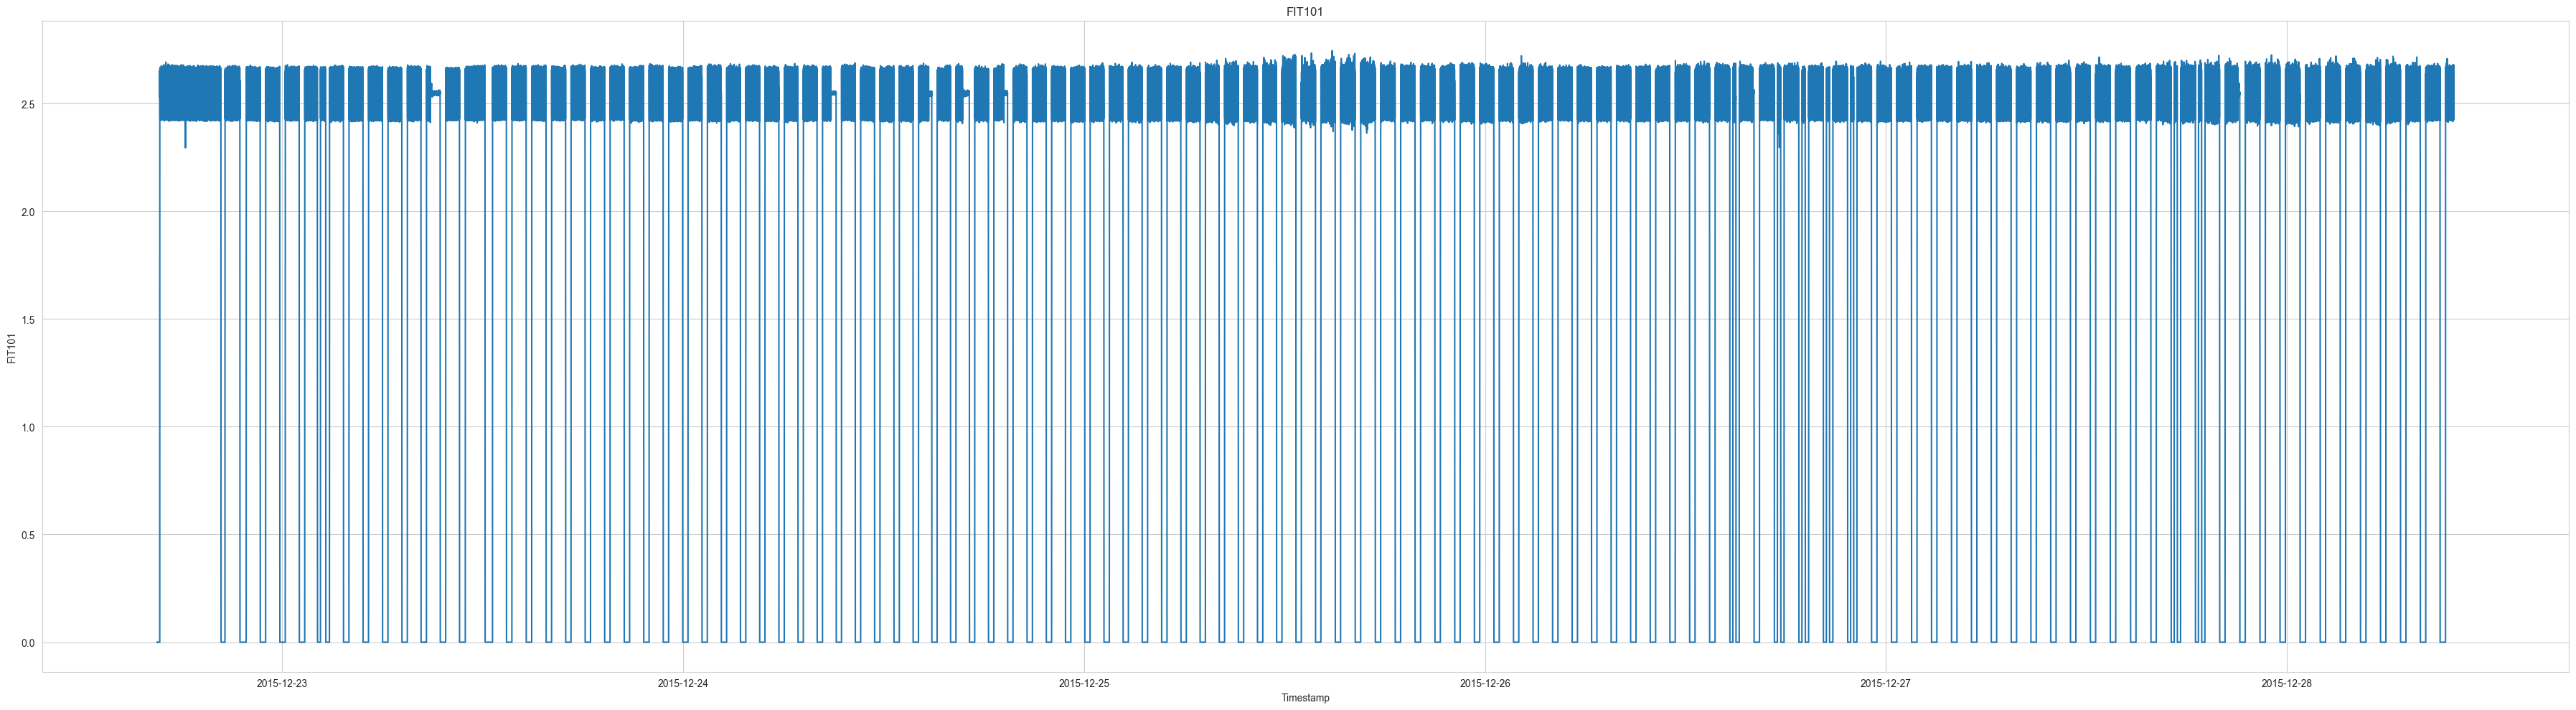

In [ ]:
#@title FIT-101: Sensor Flow meter; Measures inflow into raw water tank.
graphic_column(df,'FIT101')

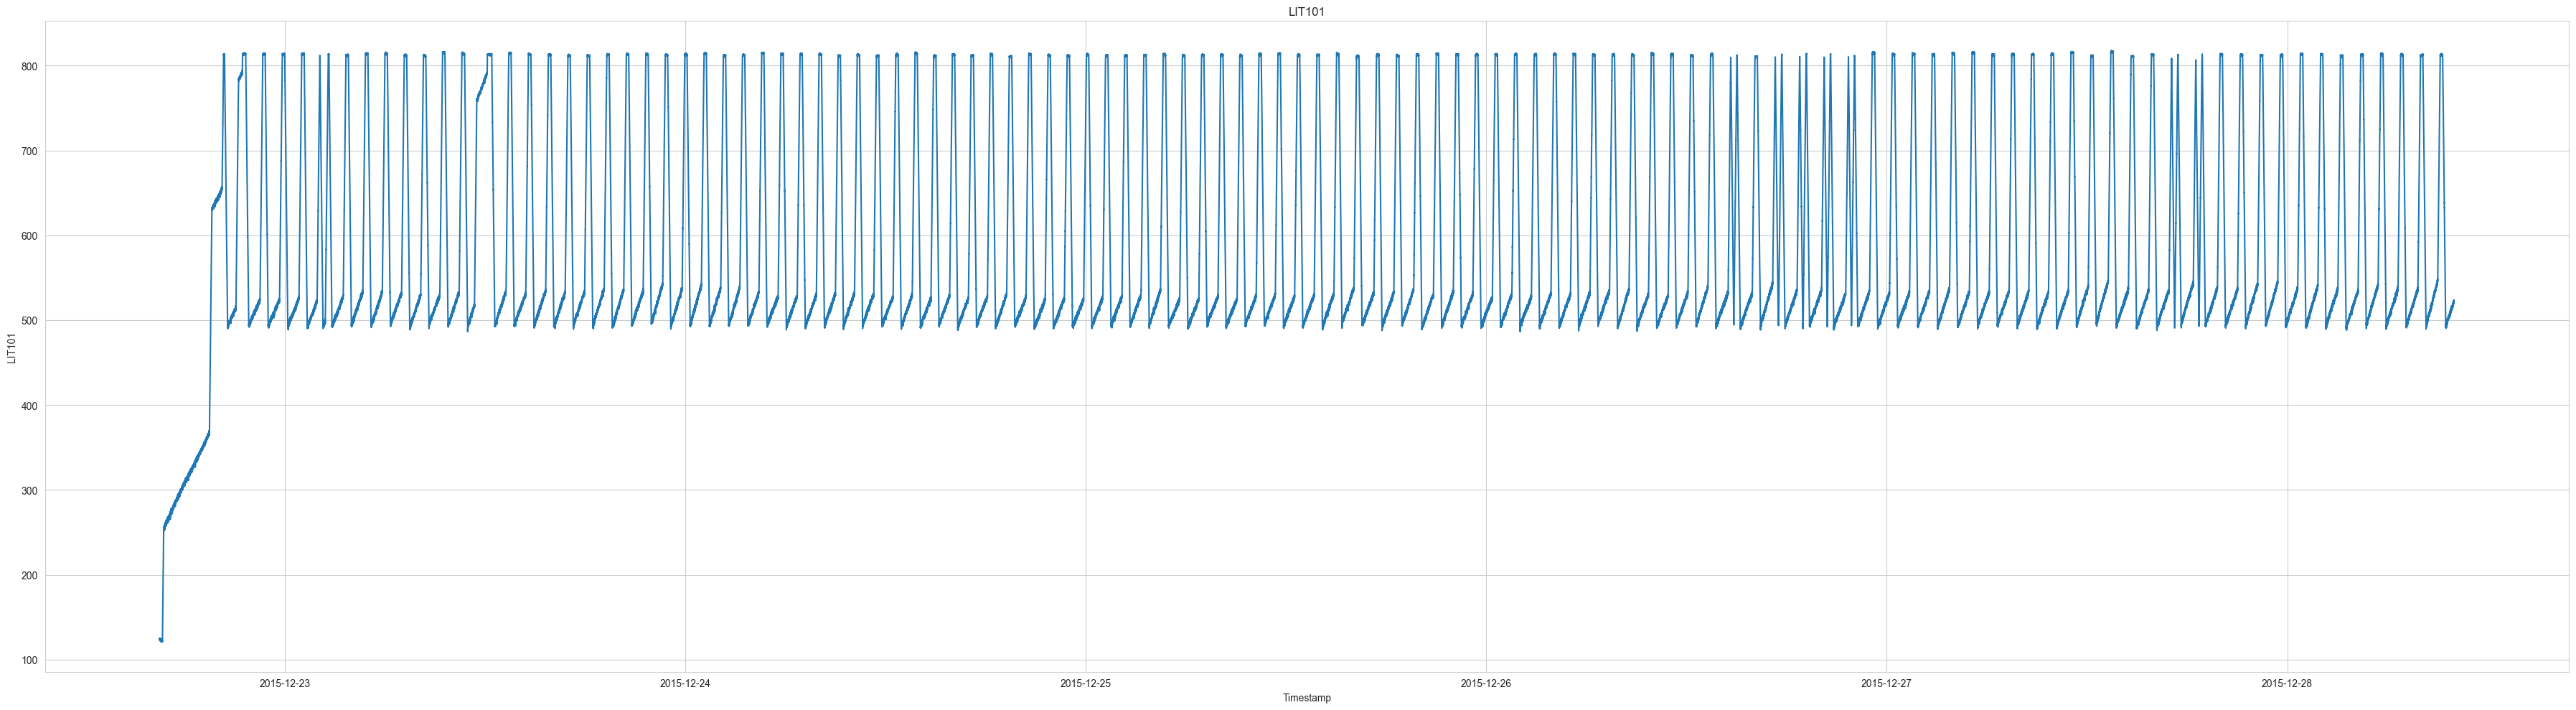

In [ ]:
#@title MV-101 - Actuator - Motorized valve; Controls water flow to the raw water tank.
graphic_column(df,'LIT101')

In [ ]:
#@title MV-101 Actuator Motorized valve; Controls water flow to the raw water tank.
df.groupby('MV101').size()

MV101
0      1994
1    134333
2    358673
dtype: int64

In [ ]:
#@title P-101 Actuator Pump; Pumps water from raw water tank to second stage.
df.groupby('P101').size()

P101
1    124171
2    370829
dtype: int64

In [ ]:
#@title P-102 (backup) Actuator Pump; Pumps water from raw water tank to second stage.
df.groupby('P102').size()

P102
1    495000
dtype: int64

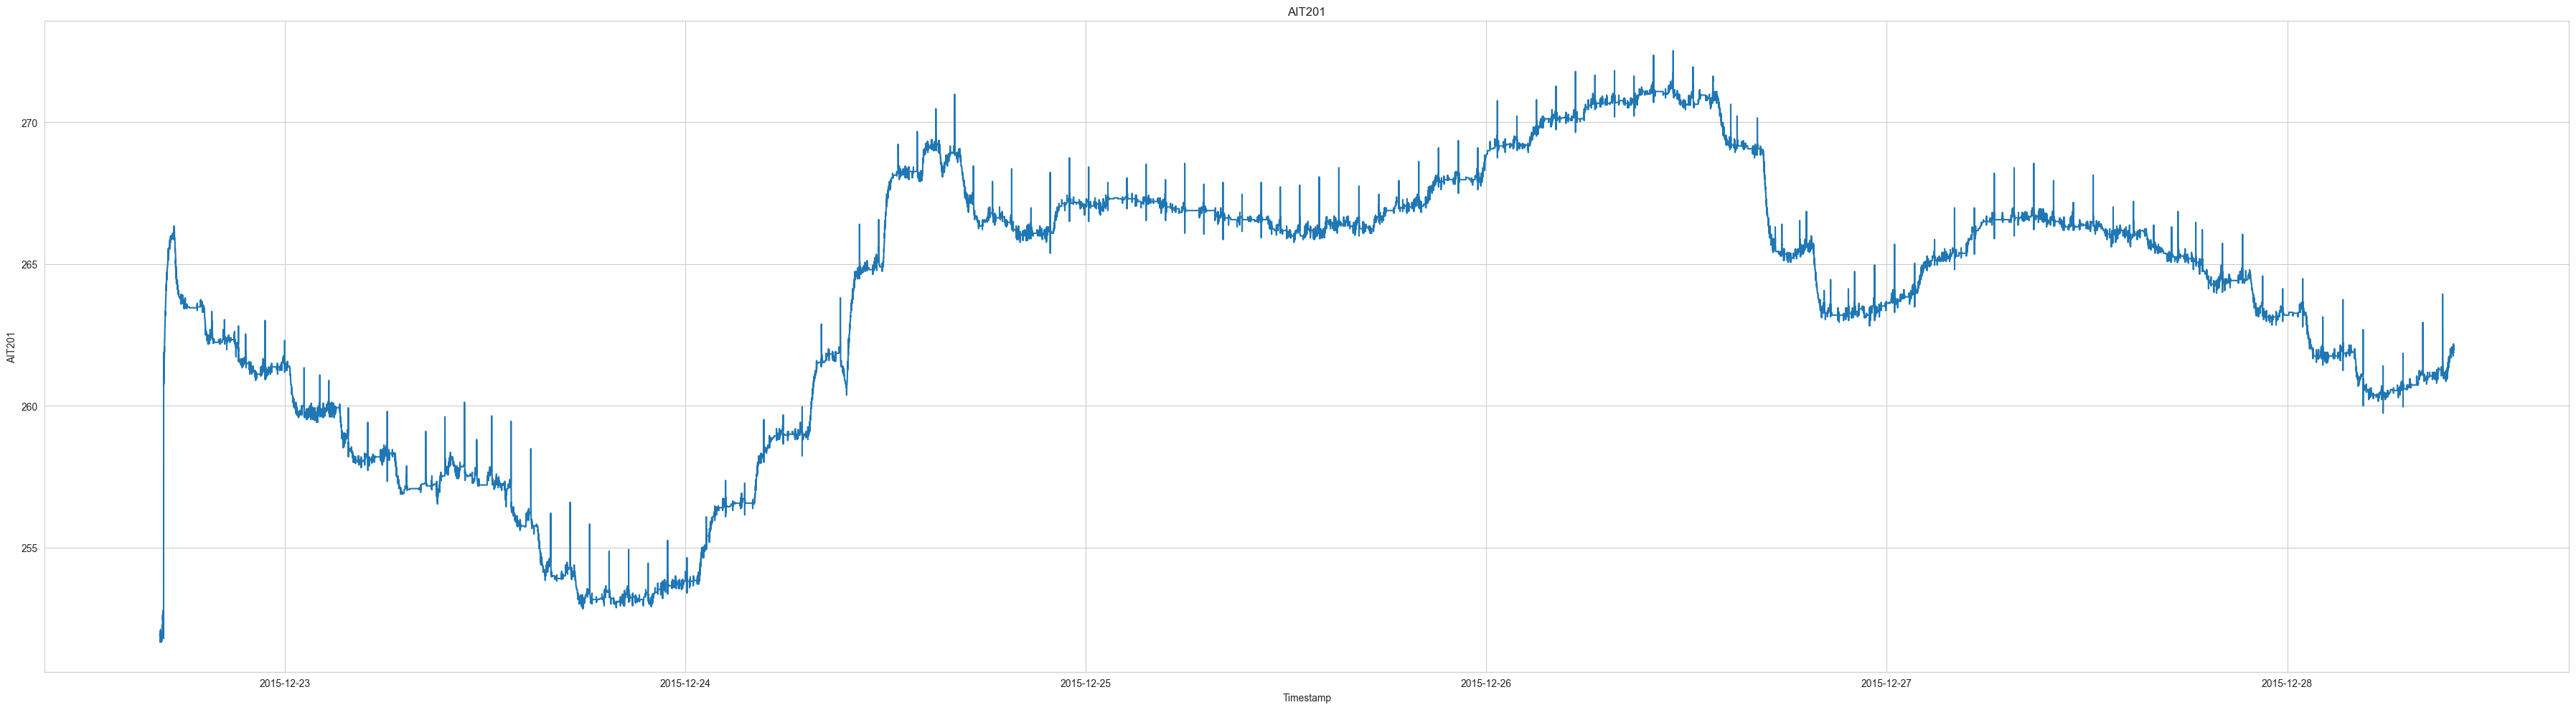

In [ ]:
#@title AIT-201 Sensor Conductivity analyser; Measures NaCl level.
graphic_column(df,'AIT201')

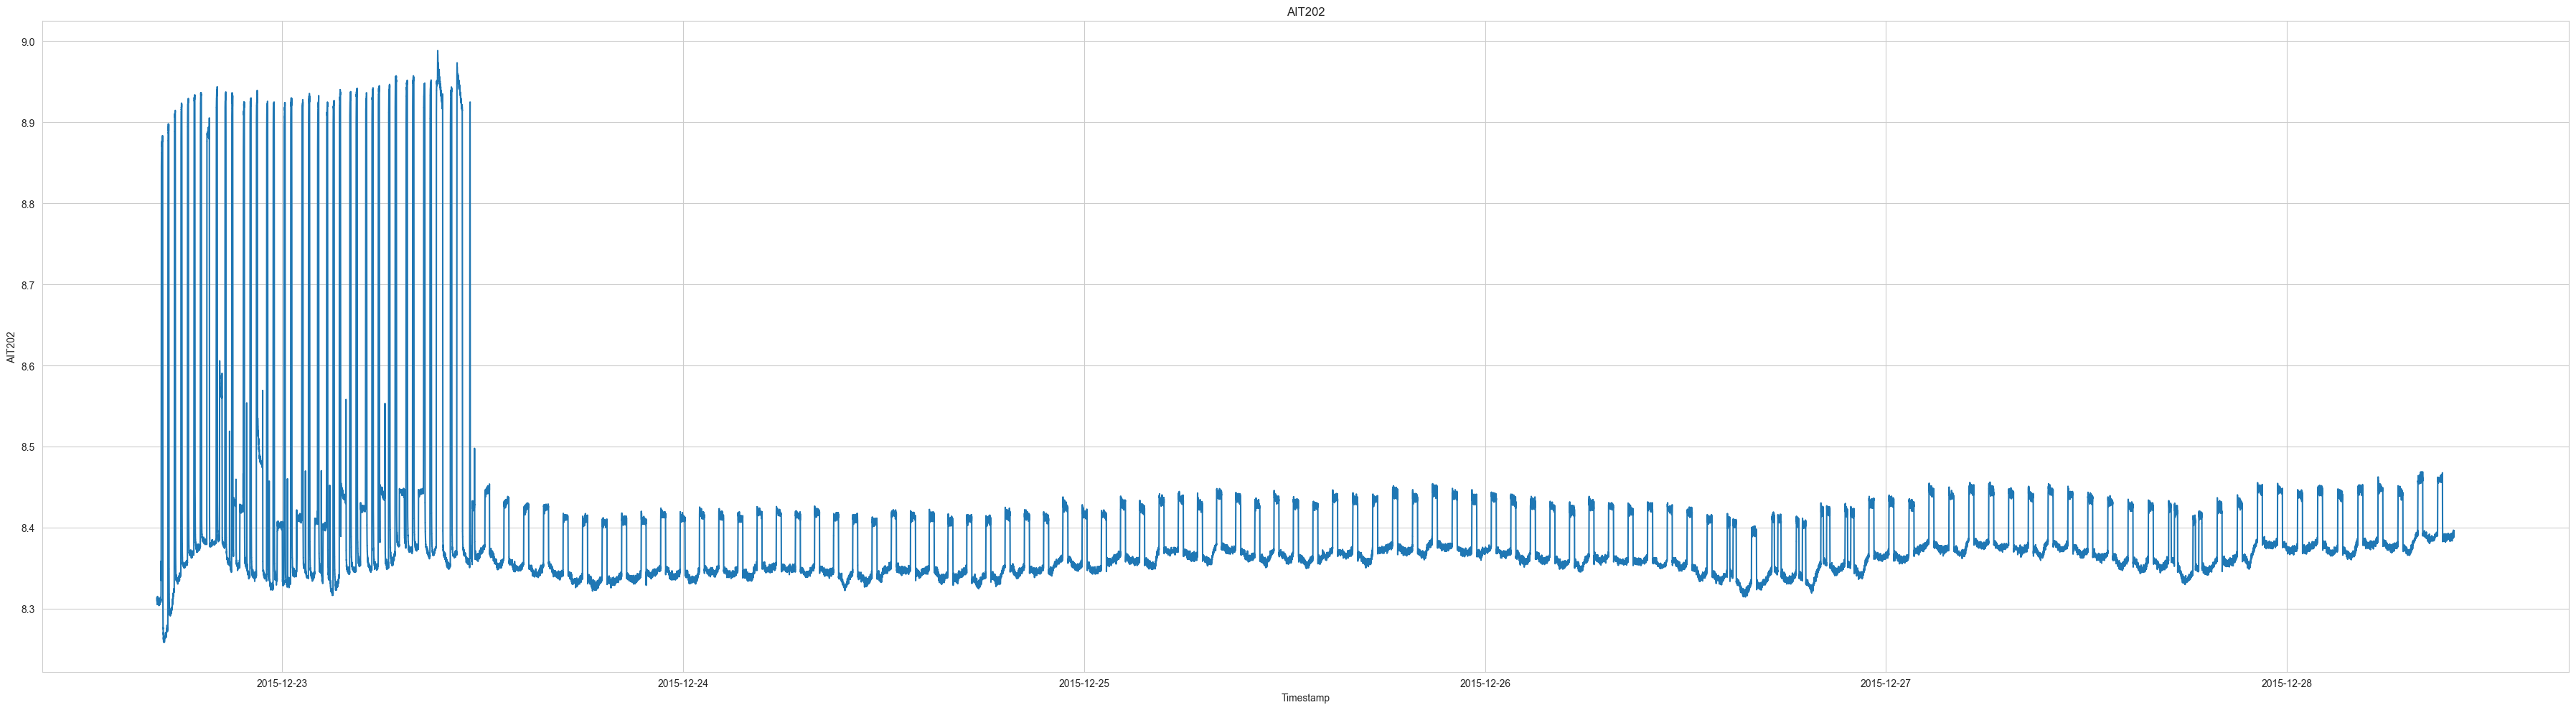

In [ ]:
#@title AIT-202 Sensor pH analyser; Measures HCl level.
graphic_column(df,'AIT202')

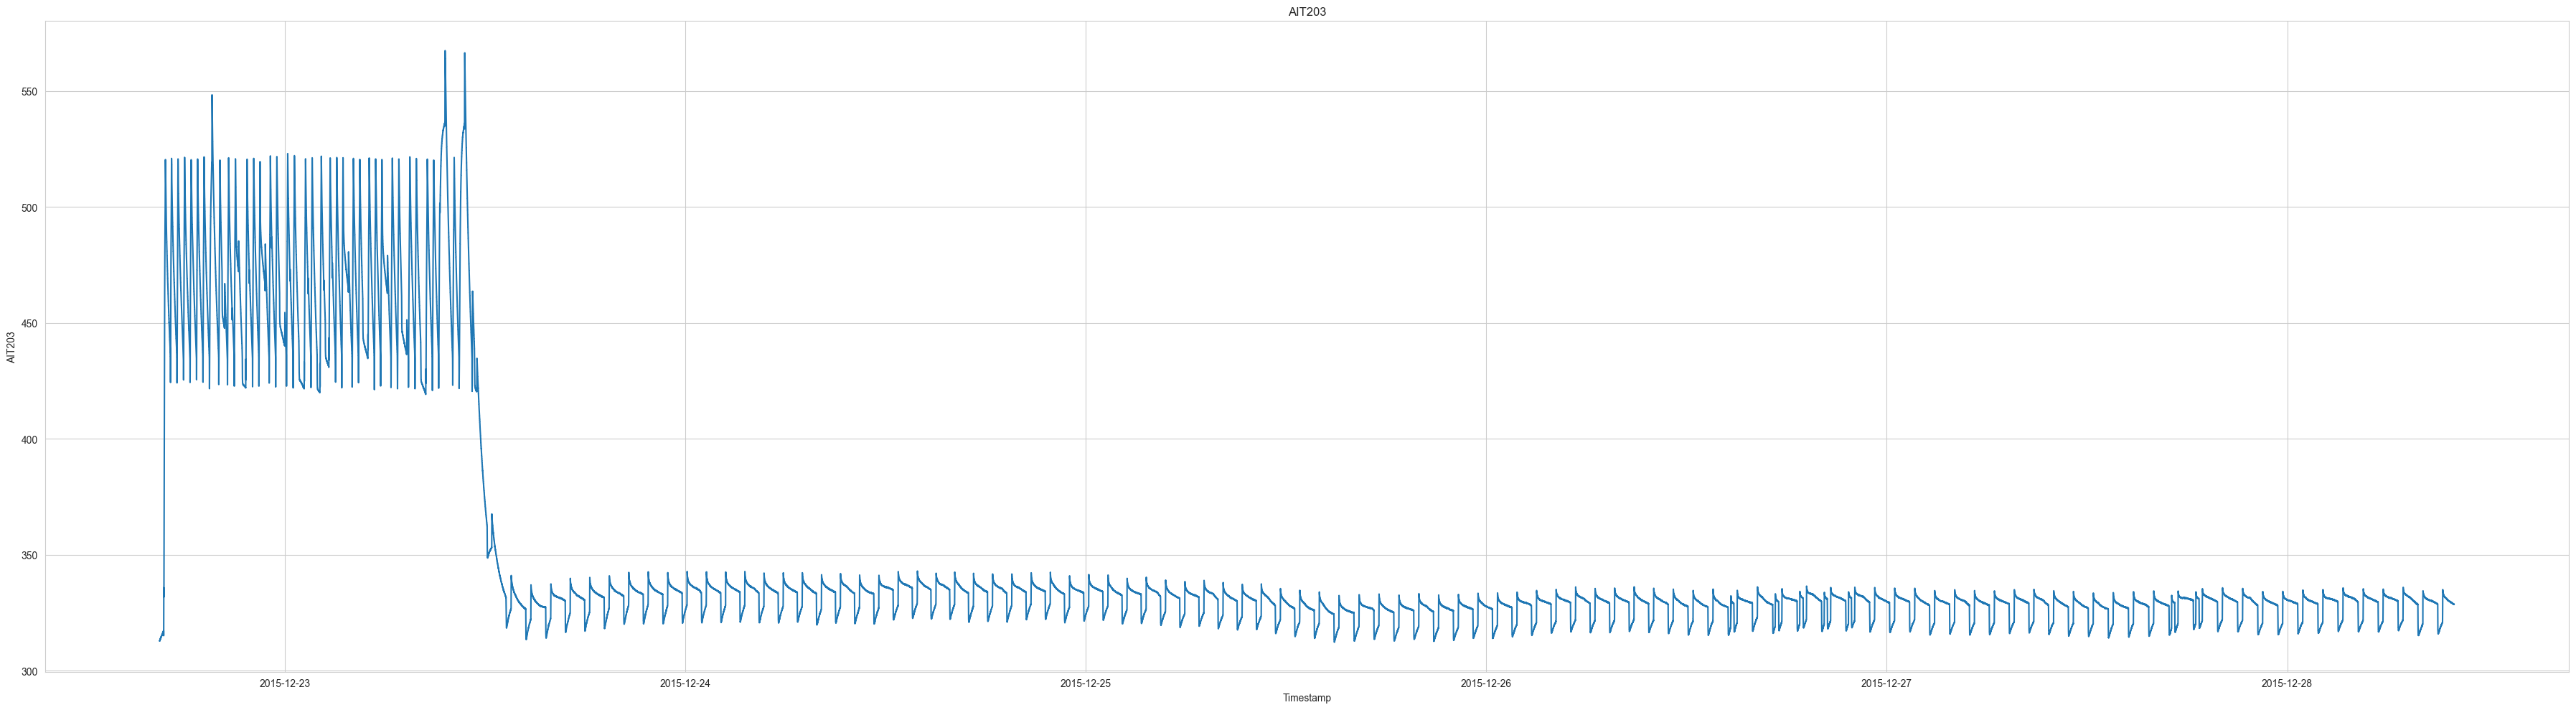

In [ ]:
#@title AIT-203 Sensor ORP analyser; Measures NaOCl level.
graphic_column(df,'AIT203')

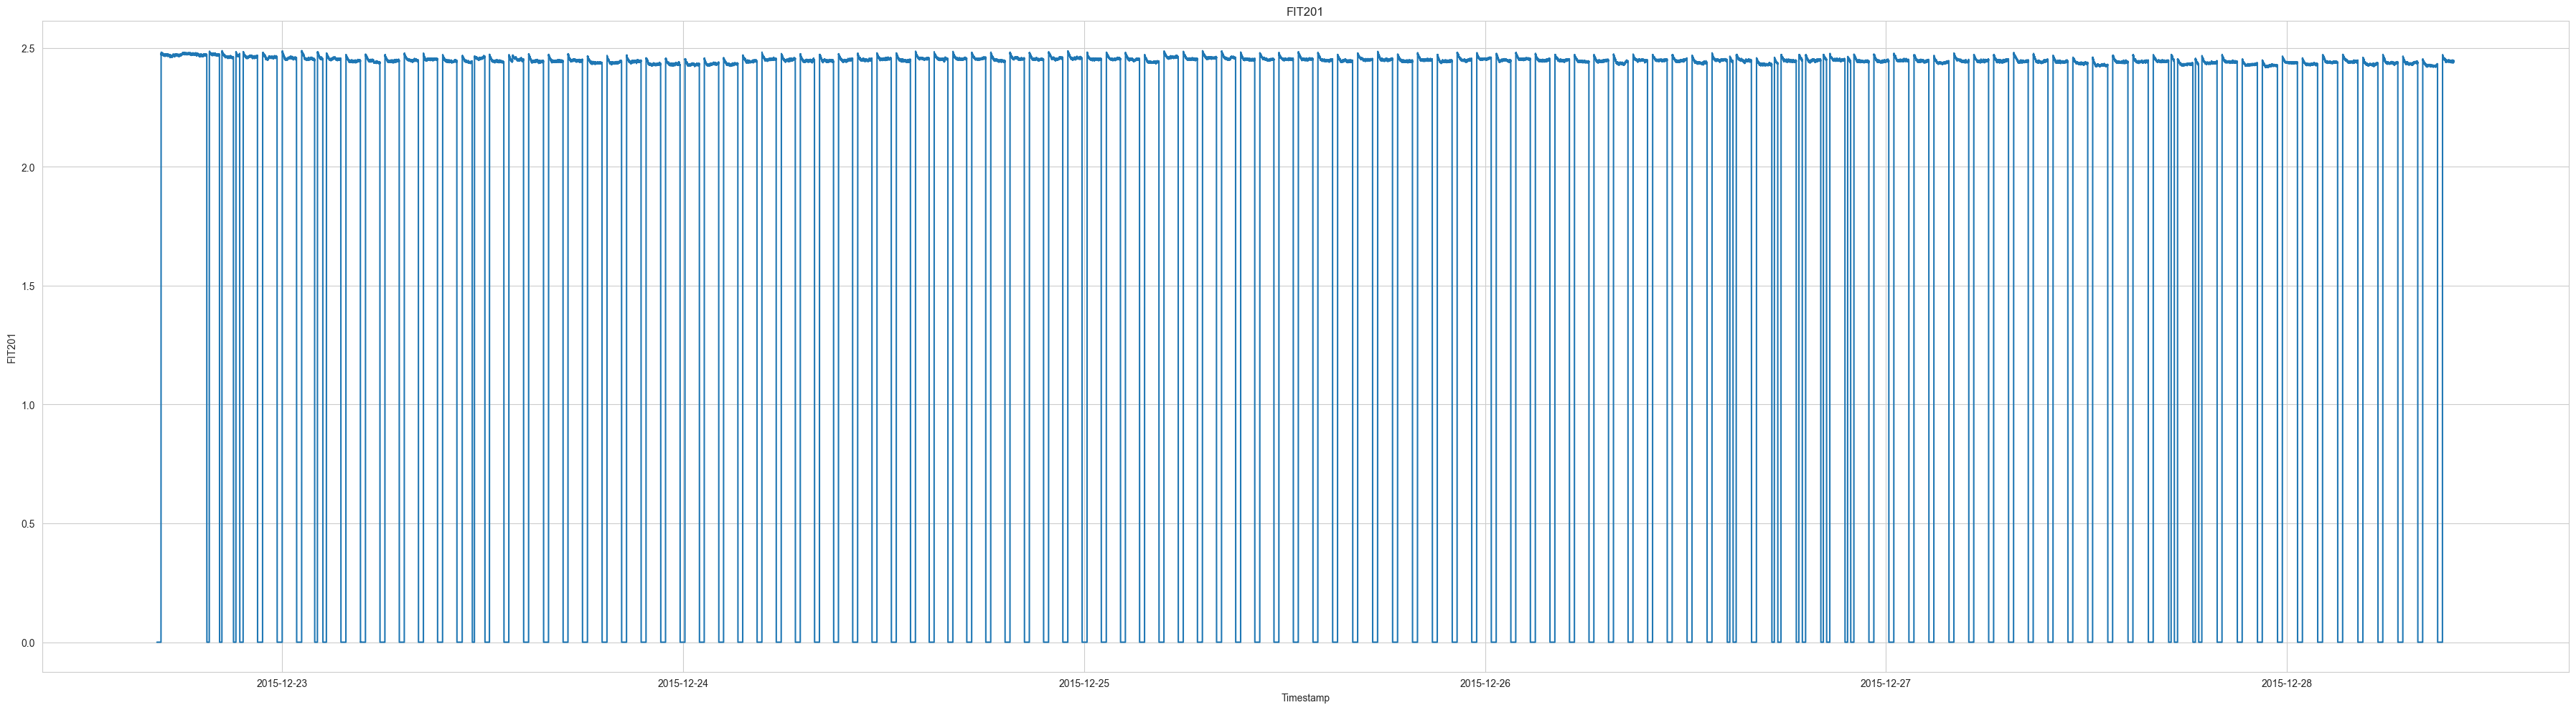

In [ ]:
#@title FIT-201 Sensor Flow Transmitter; Control dosing pumps.
graphic_column(df,'FIT201')

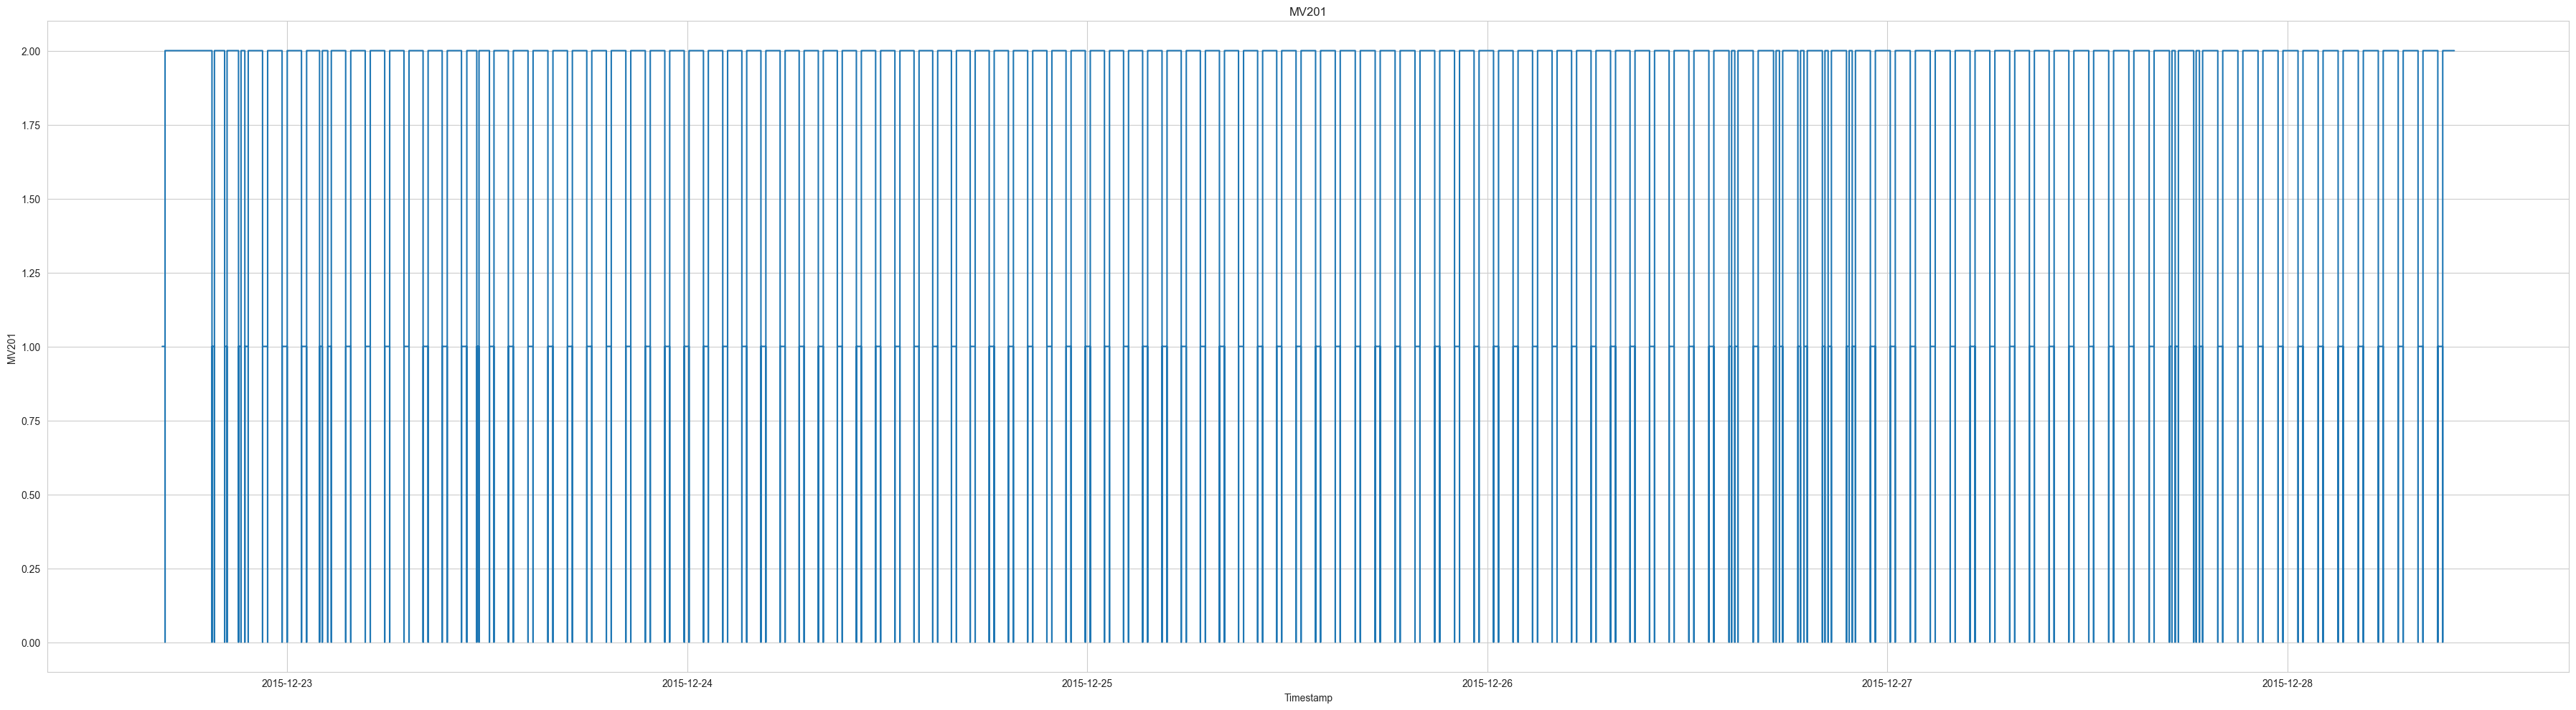

In [ ]:
#@title MV-201 Actuator Motorized valve; Controls water flow to the UF feed water tank.
graphic_column(df,'MV201')

In [ ]:
# @title P-201 Actuator Dosing pump; NaCl dosing pump.
df.groupby('P201').size()

P201
1    495000
dtype: int64

#### Attack

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

drive_folder='drive/MyDrive/siemens'
dataset_folder='itrust_local/SWaT/SWaT.A1 & A2_Dec 2015'
dataset_type='Physical'
filename='SWaT_Dataset_Attack_v0.csv'

df = pd.read_csv(os.path.join(drive_folder,dataset_folder, dataset_type,filename),low_memory=False, delimiter=';', skiprows=1)
df = df.rename(columns={' Timestamp': 'timestamp'}) # renaming column for easy use
df['timestamp'] = df['timestamp'].str.lstrip() # removing left spaces
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%d/%m/%Y %I:%M:%S %p")
df.set_index('timestamp', inplace=True)

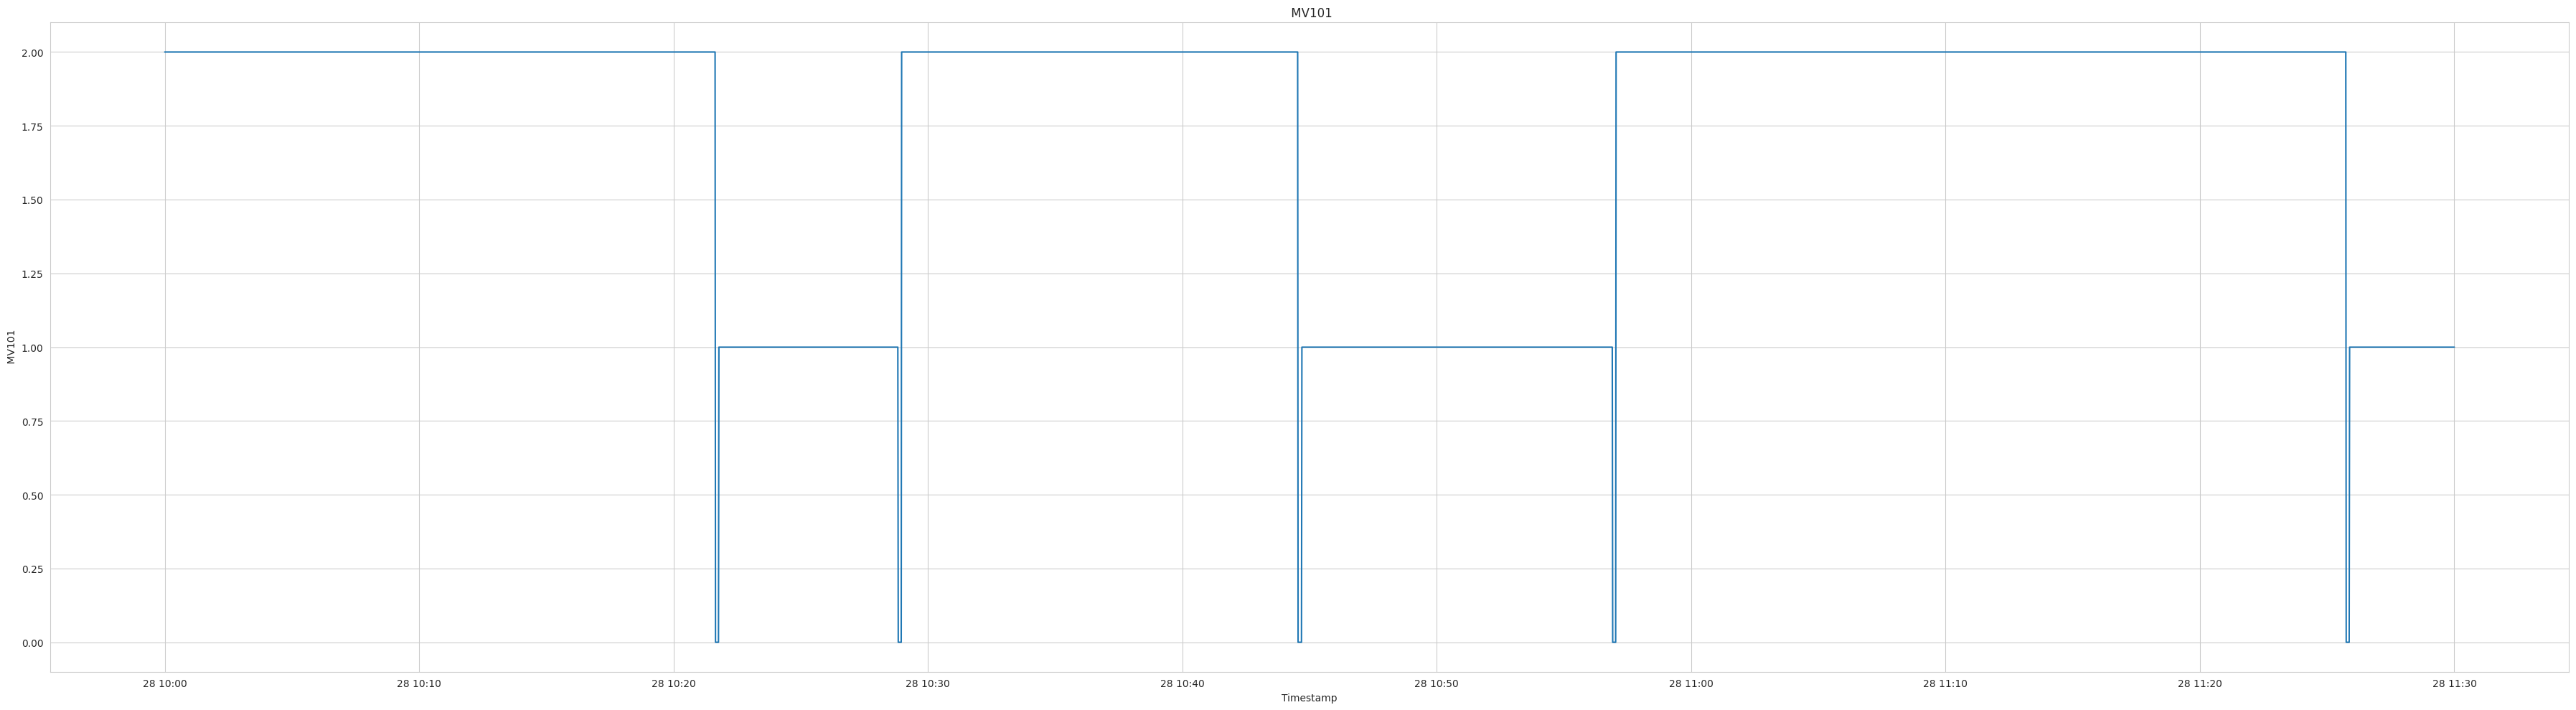

In [ ]:
# @title Attack 1 (Open MV101) 10:29:14 until 10:44:53
start_time = '2015/12/28 10:00:00'
end_time = '2015/12/28 11:30:00'
filtered_df = df.loc[start_time:end_time]
graphic_column(filtered_df,' MV101')

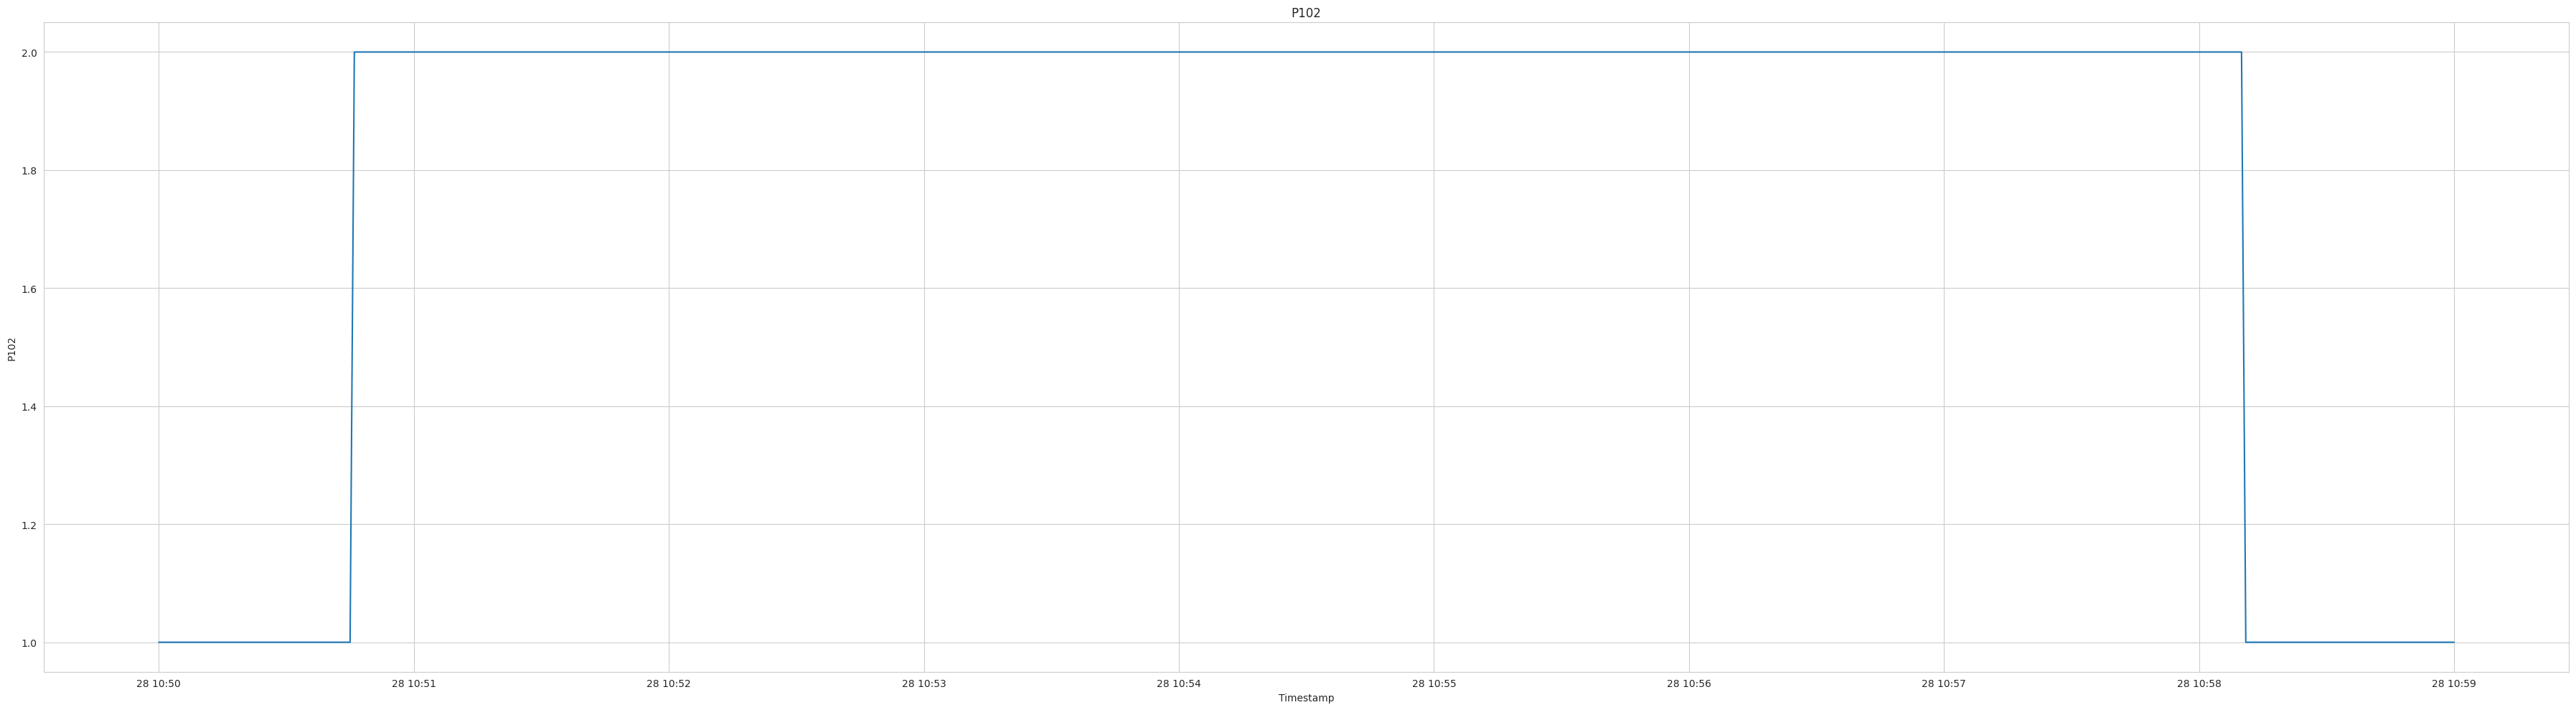

In [ ]:
# @title Attack 2 (Turn on P102) 10:51:08 until 10:58:30
start_time = '2015/12/28 10:50:00'
end_time = '2015/12/28 10:59:00'
filtered_df = df.loc[start_time:end_time]
graphic_column(filtered_df,'P102')